# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

### Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


### Carregando a base

In [5]:
base = pd.read_csv('base.csv')
base.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,1,1,1,0,46.224658,2.106849,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,3,0,1,0,0,29.230137,3.021918,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,0,0,1,0,27.482192,4.024658,1,0,1,...,1,0,0,0,0,1,0,0,0,0


### Verificando se todas as variáveis são numéricas

In [6]:
base.dtypes

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Academic degree                    int64
educacao_Higher education                   int64


### Verificando se há valores missings


In [7]:
base.isna().sum()

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary s

#### De acordo com os paços acima realizados conclui-se que a base está pronta para ser trabalhada com o scikitlearn 

### Separando variável explicativa e respostas

In [8]:
# Explicativas
X = base.drop('mau',axis = 1)
X.head(2)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [9]:
# resposta
y = base.mau
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mau, dtype: int64

### Separando base treinamento e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

#### 2.1 Definindo um objeto com a função da árvore da decisão 

In [11]:
clf = DecisionTreeClassifier(random_state=100)

#### 2.2 Treinando o modelo

In [22]:
clf = clf.fit(X_train,y_train)
y_chapeu_treino = clf.predict(X_train)


#### 2.3 Visualizando a árvore

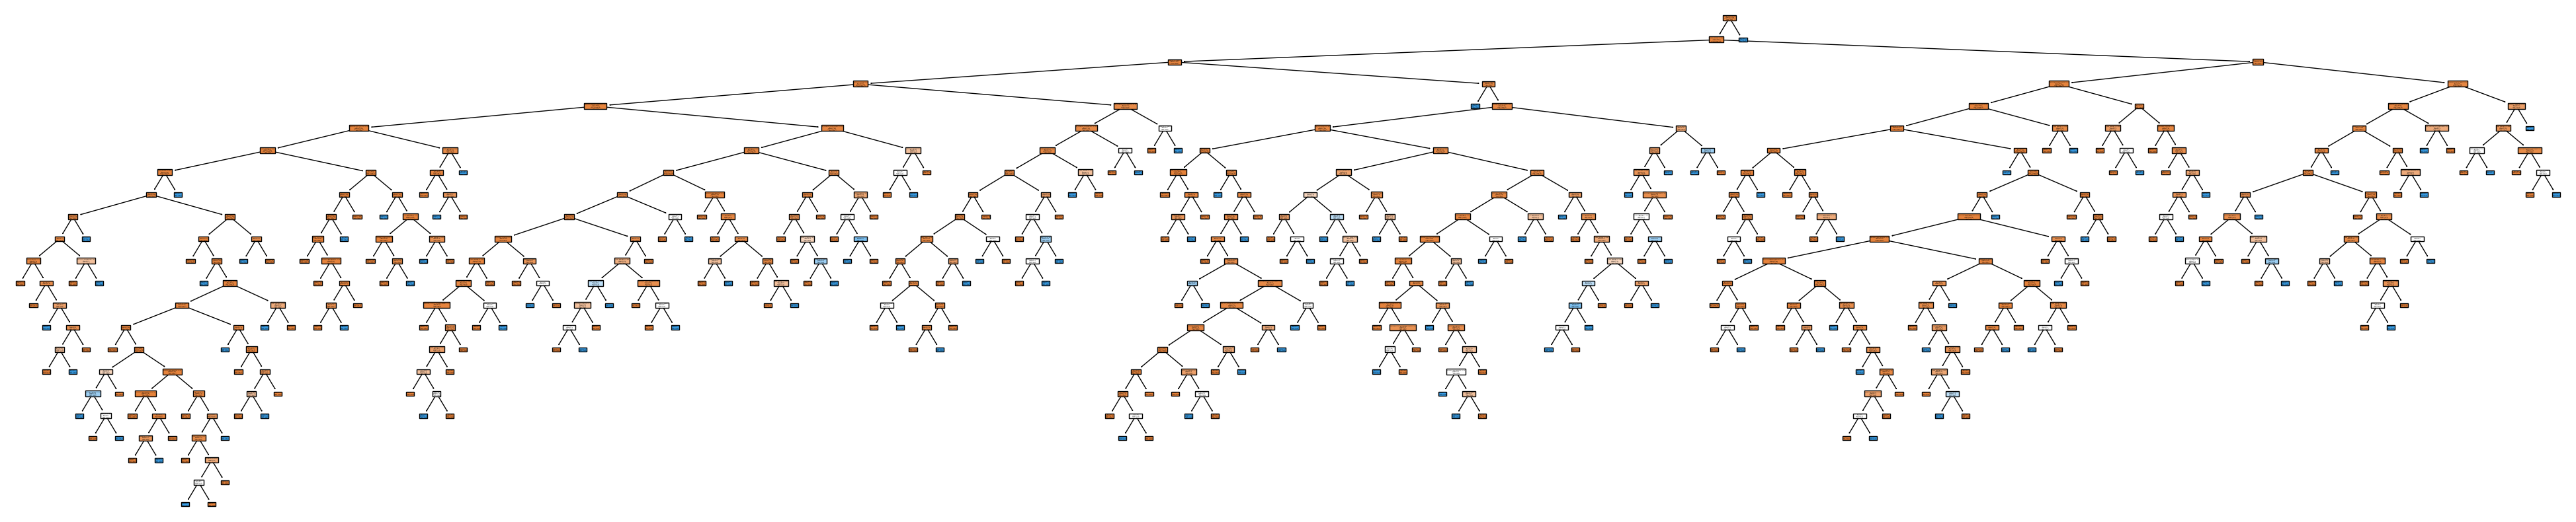

In [16]:
plt.figure(figsize=(50, 10))
plot_tree(clf,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=X.columns);

#### Visualização da matriz de classificação

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


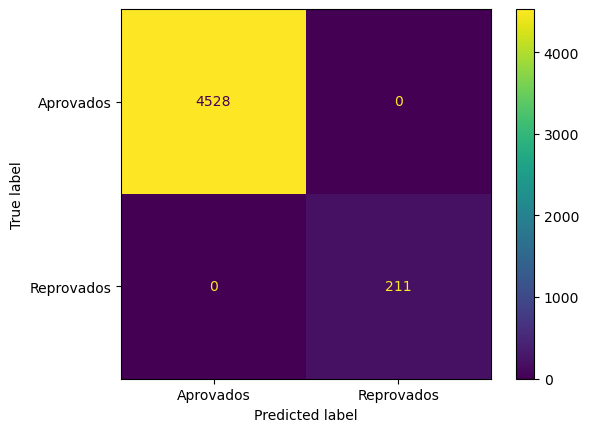

In [18]:
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);

#### 2.5 Calculando acurácia

In [21]:
accuracy_score(y_train, y_chapeu_treino)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

#### 3.1 Classificando a base de teste

In [23]:
clf = DecisionTreeClassifier(random_state=100)

In [24]:
clf = clf.fit(X_test,y_test)
y_chapeu_test = clf.predict(X_test)

#### 3.2 Produzindo a visualização da matriz de confusão

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


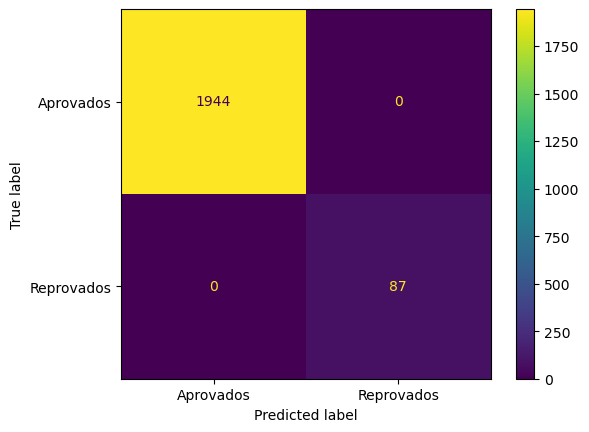

In [25]:
plot_confusion_matrix(clf, X_test,y_test, display_labels=['Aprovados', 'Reprovados']);

#### 3.3 Calculando a acurácia da base de teste

In [26]:
accuracy_score(y_test, y_chapeu_test)

1.0

#### 3.4 Treinando a árvore

In [11]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf= 5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9768586903003447

#### Avaliando a matriz de confusão

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


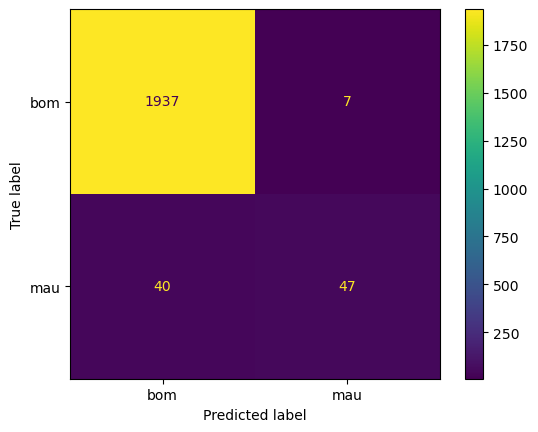

In [13]:
plot_confusion_matrix(clf, X_test,y_test, display_labels=['bom', 'mau']);

In [15]:
#proporção classificada como mau
propor_mau_pred = 47/(40+47)
propor_mau_pred 

0.5402298850574713

#### 4 - acurácia se todos forem bons

In [17]:
acuracia = (1937+7)/(1937+7+40+47)
acuracia

0.9571639586410635